In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
plt.rcParams['figure.figsize'] = [6, 8]

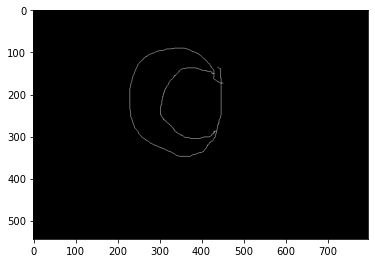

In [25]:
img = cv2.imread("exam1.png", 0)
plt.imshow(img, cmap='gray')

In [4]:
# # Transformation ảnh về cùng một hình thái
# h, w = img.shape
# pts1 = np.float32([[28, 7], [540, 0], [7, 720], [540, 730]])
# pts2 = np.float32([[0, 0], [w, 0], [0, h], [w, h]])
# M = cv2.getPerspectiveTransform(pts1, pts2)
# img = cv2.warpPerspective(img, M, (w,h))

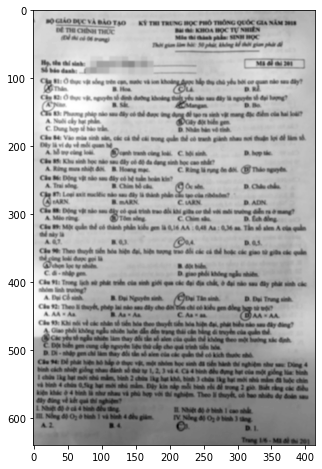

In [5]:
im = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(im, cmap='gray')

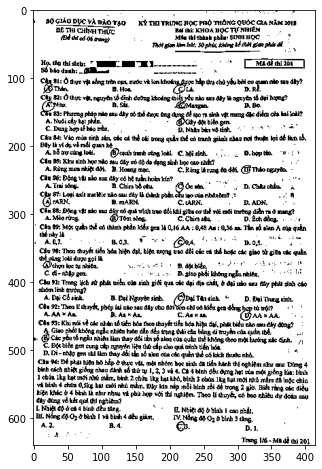

In [6]:
im = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,31,7)
plt.imshow(im, cmap='gray')

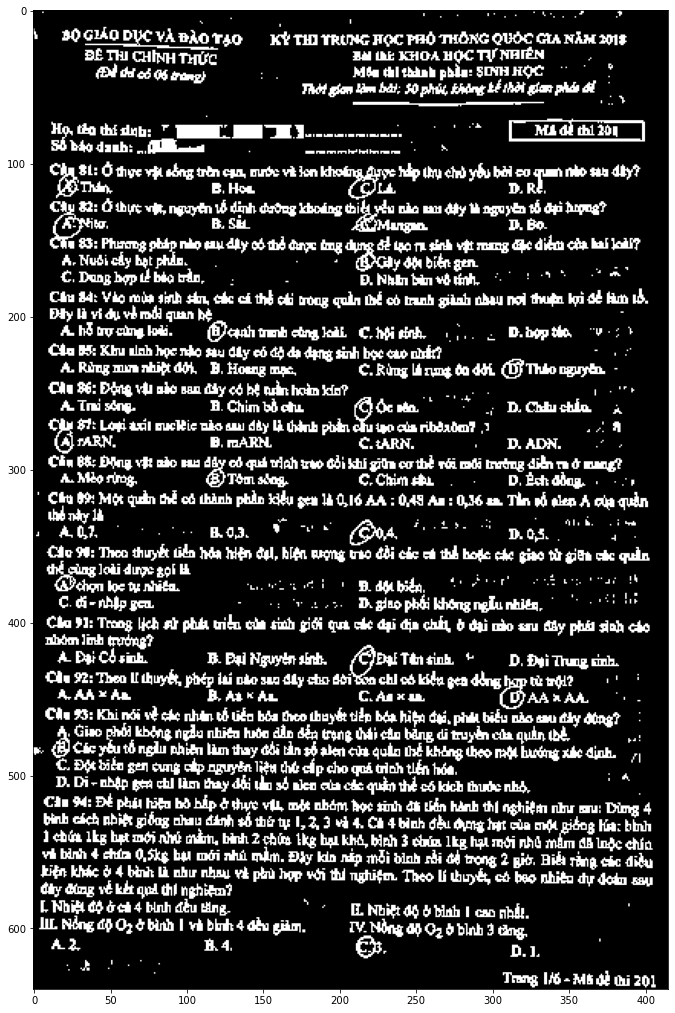

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
closing = cv2.morphologyEx(255-im, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(18,18))
plt.imshow(closing, cmap='gray')

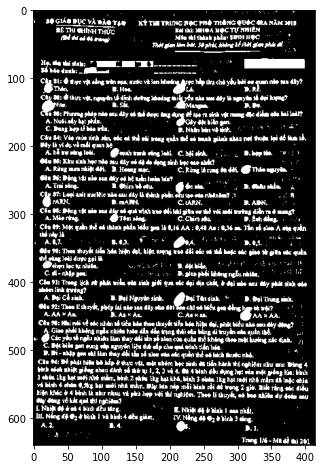

In [8]:
# lấp chỗ trống trong những hình tròn
from scipy.ndimage.morphology import binary_fill_holes

# binary_fill_holes là 1 hàm binary delation
clean_image = binary_fill_holes(closing)
plt.imshow(clean_image, cmap='gray')

In [9]:
clean_image = np.float32(clean_image)

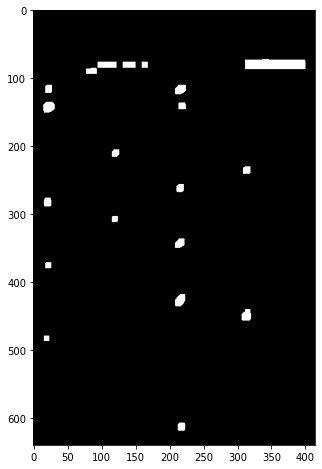

In [10]:
# Opening (mục đích để loại bỏ trường hợp 2 hình tròn dính nhau, hoặc hình tròn dính vào chữ, 
# tuy nhiên opening làm mất dấu khi các hình tròn bị gạch chéo)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8,8))
opening = cv2.morphologyEx(clean_image, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

In [11]:
# Lấy ra vị trí các contour (contour là 1 chuỗi tọa độ (x_i, y_) các điểm có cùng độ sáng dọc theo biên của 1 object (t đang hiểu là thế))
contours, _ = cv2.findContours(opening.astype(np.uint8), # pylint: disable=unused-variable
                                  cv2.RETR_EXTERNAL,
                                  cv2.CHAIN_APPROX_NONE)

# Vẽ contour
obj_image = np.zeros(opening.shape)
for index, cnt in enumerate(contours):
    print(cnt.shape)
    print(cnt)
    cv2.drawContours(opening, [cnt], 0, 255, -1)

(37, 1, 2)
[[[215 607]]

 [[214 608]]

 [[213 609]]

 [[213 610]]

 [[213 611]]

 [[213 612]]

 [[213 613]]

 [[213 614]]

 [[213 615]]

 [[213 616]]

 [[213 617]]

 [[214 618]]

 [[215 618]]

 [[216 618]]

 [[217 618]]

 [[218 618]]

 [[219 618]]

 [[220 618]]

 [[221 618]]

 [[222 618]]

 [[223 617]]

 [[223 616]]

 [[223 615]]

 [[223 614]]

 [[223 613]]

 [[223 612]]

 [[223 611]]

 [[223 610]]

 [[223 609]]

 [[223 608]]

 [[222 607]]

 [[221 607]]

 [[220 607]]

 [[219 607]]

 [[218 607]]

 [[217 607]]

 [[216 607]]]
(28, 1, 2)
[[[ 16 479]]

 [[ 16 480]]

 [[ 16 481]]

 [[ 16 482]]

 [[ 16 483]]

 [[ 16 484]]

 [[ 16 485]]

 [[ 16 486]]

 [[ 17 486]]

 [[ 18 486]]

 [[ 19 486]]

 [[ 20 486]]

 [[ 21 486]]

 [[ 22 486]]

 [[ 23 486]]

 [[ 23 485]]

 [[ 23 484]]

 [[ 23 483]]

 [[ 23 482]]

 [[ 23 481]]

 [[ 23 480]]

 [[ 23 479]]

 [[ 22 479]]

 [[ 21 479]]

 [[ 20 479]]

 [[ 19 479]]

 [[ 18 479]]

 [[ 17 479]]]
(50, 1, 2)
[[[312 440]]

 [[312 441]]

 [[312 442]]

 [[312 443]]

 

In [12]:
# contours, _ = cv2.findContours(img.astype(np.uint8), # pylint: disable=unused-variable
#                                   cv2.RETR_EXTERNAL,
#                                   cv2.CHAIN_APPROX_NONE)

# # Vẽ contour
# obj_image = np.zeros(img.shape)
# for index, cnt in enumerate(contours):
#     print(cnt.shape)
#     print(cnt)
#     cv2.drawContours(img, [cnt], 0, 255, -1)

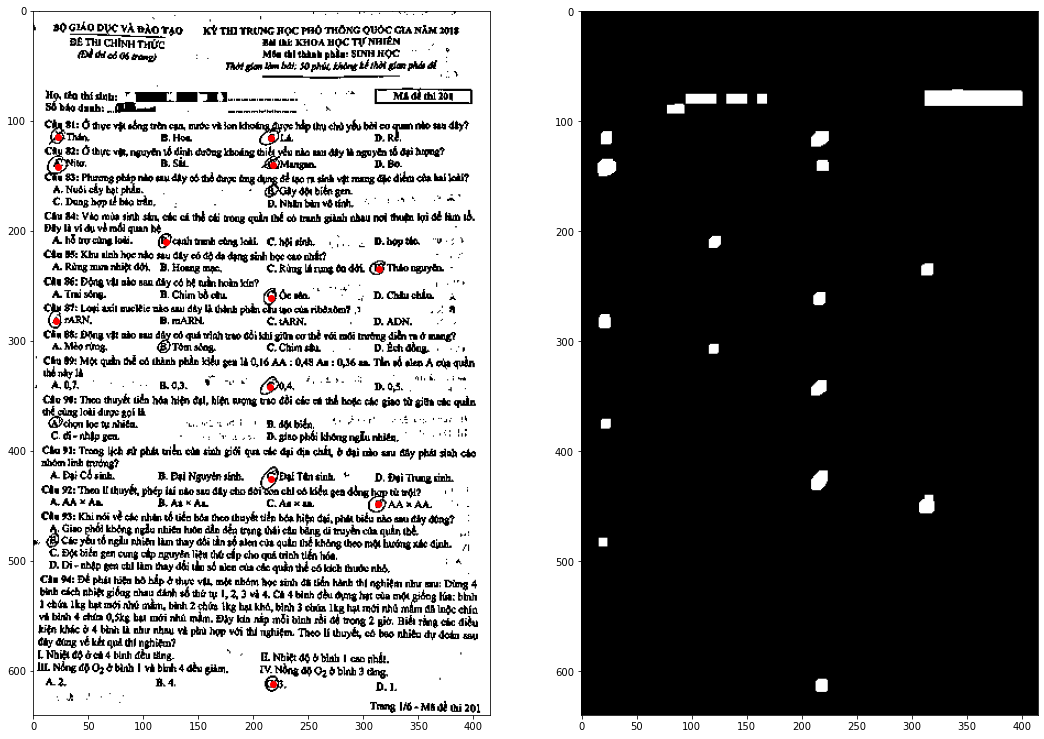

In [13]:
import matplotlib.pyplot as plt

round_thresh = 0.69

plt.figure(figsize=(18,18))
height, width = im.shape
# plt.subplot(1, 3, 2), plt.imshow(opening, cmap='gray')
# plt.subplot(1, 3, 1), plt.imshow(im.astype(np.uint8), cmap='gray')
# plt.subplot(1, 3, 3), plt.imshow(clean_image, cmap='gray')

plt.subplot(1, 2, 2), plt.imshow(opening, cmap='gray')
plt.subplot(1, 2, 1), plt.imshow(im.astype(np.uint8), cmap='gray')
areas = []
alphas = []
centers = []

# print('Object      Area Perimeter Roundness')
for ind, contour in enumerate(contours):
    # tính chu vi của contour
    perimeter = cv2.arcLength(contour, True)
    # tính diện tích của contour
    area = cv2.contourArea(contour)
    areas.append(area)
    
    # nếu như chu vi bằng 0 hoặc area nhỏ hơn threshold thì ta đặt ngay góc alpha = 0
    if perimeter==0 or area<70:
        alpha = 0
    else:
        alpha = 4*np.pi*area/(perimeter**2)
        alphas.append(alpha)

    # Vẽ vòng tròn đỏ tại tâm của contour thỏa mãn điều kiện là vòng tròn
    if alpha > round_thresh:
        moments = cv2.moments(contour)
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])
        
        if cy > 110:
            plt.plot(cx, cy, 'ro')
            centers.append([cx, cy])

axes = plt.gca()
axes.set_xlim([0, width])
axes.set_ylim([height, 0])

plt.show()

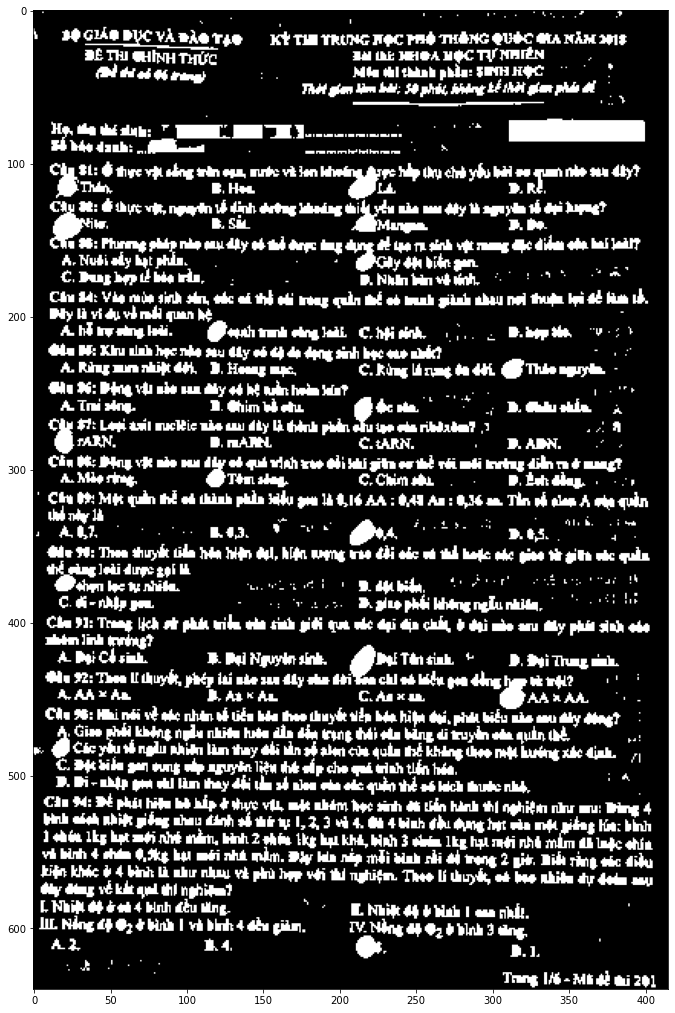

In [14]:
plt.figure(figsize=(18,18))
plt.imshow(clean_image, cmap='gray')

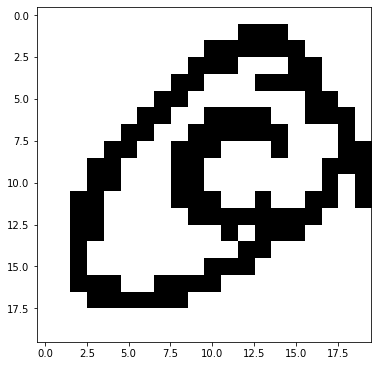

In [58]:
d = 10
y1 = centers[3][0] - d 
y2 = centers[3][0] + d
x1 = centers[3][1] - d
x2 = centers[3][1] + d
plt.imshow(im[x1:x2, y1:y2], cmap='gray')